# About

On this notebook we setup the last and complete steps for the pipeline.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Definitions

REGION = "BigBuenosAiresCityCenter"

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import Polygon
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()

import tools

In [4]:
subset = tools.load_subset(REGION)
subset

Subset BigBuenosAiresCityCenter loaded with 144850 entries.


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.629947,-58.361150,38.4246,0.7109,"POLYGON((-58.3611720314689 -34.6299919688764, ...",48Q39JCQ+2GH2
1,-34.621027,-58.397749,166.0266,0.6961,"POLYGON((-58.3976940502514 -34.6211128950923, ...",48Q39JH2+HWJR
2,-34.609757,-58.372732,137.1630,0.7771,"POLYGON((-58.3726862870237 -34.6098345100679, ...",48Q39JRG+3WRP
3,-34.615215,-58.412942,37.7274,0.8451,"POLYGON((-58.412915413868 -34.615254819972, -5...",48Q39HMP+WR7H
4,-34.580058,-58.404110,131.4214,0.8165,"POLYGON((-58.4040213914141 -34.5800603862449, ...",48Q3CH9W+X9CM
...,...,...,...,...,...,...
144845,-34.616090,-58.425453,108.0414,0.7839,"POLYGON((-58.4254333145451 -34.6161750233704, ...",48Q39HMF+HR78
144846,-34.632775,-58.397135,87.8007,0.7372,"POLYGON((-58.397069288131 -34.6328010879109, -...",48Q39J83+V4QW
144847,-34.631452,-58.398772,29.8493,0.6731,"POLYGON((-58.3987373989918 -34.6314794744601, ...",48Q39J92+CF9V
144848,-34.608223,-58.387176,20.2716,0.6952,"POLYGON((-58.3871466246279 -34.6082398692629, ...",48Q39JR7+P483


In [5]:
# We transform data types and create the geopandas dataframe
subset = tools.convert_to_gpd(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,-34.629947,-58.361150,38.4246,0.7109,"POLYGON ((-58.36117 -34.62999, -58.3611 -34.62...",48Q39JCQ+2GH2
1,-34.621027,-58.397749,166.0266,0.6961,"POLYGON ((-58.39769 -34.62111, -58.39771 -34.6...",48Q39JH2+HWJR
2,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((-58.37269 -34.60983, -58.37269 -34.6...",48Q39JRG+3WRP
3,-34.615215,-58.412942,37.7274,0.8451,"POLYGON ((-58.41292 -34.61525, -58.41292 -34.6...",48Q39HMP+WR7H
4,-34.580058,-58.404110,131.4214,0.8165,"POLYGON ((-58.40402 -34.58006, -58.40411 -34.5...",48Q3CH9W+X9CM
...,...,...,...,...,...,...
144845,-34.616090,-58.425453,108.0414,0.7839,"POLYGON ((-58.42543 -34.61618, -58.42544 -34.6...",48Q39HMF+HR78
144846,-34.632775,-58.397135,87.8007,0.7372,"POLYGON ((-58.39707 -34.6328, -58.39709 -34.63...",48Q39J83+V4QW
144847,-34.631452,-58.398772,29.8493,0.6731,"POLYGON ((-58.39874 -34.63148, -58.39877 -34.6...",48Q39J92+CF9V
144848,-34.608223,-58.387176,20.2716,0.6952,"POLYGON ((-58.38715 -34.60824, -58.38715 -34.6...",48Q39JR7+P483


<Axes: >

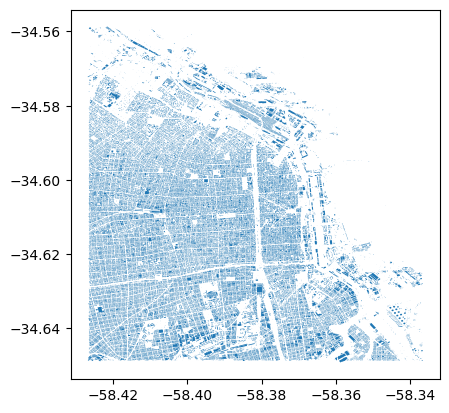

In [6]:
# We check the visualization of the data
subset.plot() # This could take a while for big subsets.

In [7]:
long_area_center, lat_area_center = tools.get_area_center(subset)
print(f"Center of the area: {long_area_center}, {lat_area_center}")

Center of the area: -58.381601239999995, -34.60372241


In [8]:
# We add the relative to area center positions in terms of cells and cell size

subset = tools.add_derivate_columns(subset)
subset

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,relative_lat,relative_lon,cell_long_pos,cell_lat_pos,size_in_cells
0,-34.629947,-58.361150,38.4246,0.7109,"POLYGON ((-58.36117 -34.62999, -58.3611 -34.62...",48Q39JCQ+2GH2,-0.026225,0.020452,227,-292,1
1,-34.621027,-58.397749,166.0266,0.6961,"POLYGON ((-58.39769 -34.62111, -58.39771 -34.6...",48Q39JH2+HWJR,-0.017304,-0.016147,-180,-193,2
2,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((-58.37269 -34.60983, -58.37269 -34.6...",48Q39JRG+3WRP,-0.006034,0.008869,98,-68,1
3,-34.615215,-58.412942,37.7274,0.8451,"POLYGON ((-58.41292 -34.61525, -58.41292 -34.6...",48Q39HMP+WR7H,-0.011492,-0.031340,-349,-128,1
4,-34.580058,-58.404110,131.4214,0.8165,"POLYGON ((-58.40402 -34.58006, -58.40411 -34.5...",48Q3CH9W+X9CM,0.023665,-0.022509,-251,263,1
...,...,...,...,...,...,...,...,...,...,...,...
144845,-34.616090,-58.425453,108.0414,0.7839,"POLYGON ((-58.42543 -34.61618, -58.42544 -34.6...",48Q39HMF+HR78,-0.012368,-0.043852,-489,-138,1
144846,-34.632775,-58.397135,87.8007,0.7372,"POLYGON ((-58.39707 -34.6328, -58.39709 -34.63...",48Q39J83+V4QW,-0.029053,-0.015534,-173,-324,1
144847,-34.631452,-58.398772,29.8493,0.6731,"POLYGON ((-58.39874 -34.63148, -58.39877 -34.6...",48Q39J92+CF9V,-0.027730,-0.017171,-192,-309,1
144848,-34.608223,-58.387176,20.2716,0.6952,"POLYGON ((-58.38715 -34.60824, -58.38715 -34.6...",48Q39JR7+P483,-0.004500,-0.005574,-63,-51,1


In [9]:
# Now we create the cells grid

poly_grid = tools.create_grid(subset)

100%|██████████| 1000/1000 [01:03<00:00, 15.86it/s]


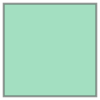

In [10]:
poly_grid[0][0]

In [25]:
# We add overlapping column to each building

subset = tools.add_overlapping_cells(subset, poly_grid)
subset

100%|██████████| 144850/144850 [02:42<00:00, 889.35it/s]


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,relative_lat,relative_lon,cell_long_pos,cell_lat_pos,size_in_cells,overlapping
0,-34.629947,-58.361150,38.4246,0.7109,"POLYGON ((-58.36117 -34.62999, -58.3611 -34.62...",48Q39JCQ+2GH2,-0.026225,0.020452,227,-292,1,"[{'cell_long_pos': 227, 'cell_lat_pos': -293, ..."
1,-34.621027,-58.397749,166.0266,0.6961,"POLYGON ((-58.39769 -34.62111, -58.39771 -34.6...",48Q39JH2+HWJR,-0.017304,-0.016147,-180,-193,2,"[{'cell_long_pos': -181, 'cell_lat_pos': -194,..."
2,-34.609757,-58.372732,137.1630,0.7771,"POLYGON ((-58.37269 -34.60983, -58.37269 -34.6...",48Q39JRG+3WRP,-0.006034,0.008869,98,-68,1,"[{'cell_long_pos': 98, 'cell_lat_pos': -69, 'a..."
3,-34.615215,-58.412942,37.7274,0.8451,"POLYGON ((-58.41292 -34.61525, -58.41292 -34.6...",48Q39HMP+WR7H,-0.011492,-0.031340,-349,-128,1,"[{'cell_long_pos': -350, 'cell_lat_pos': -129,..."
4,-34.580058,-58.404110,131.4214,0.8165,"POLYGON ((-58.40402 -34.58006, -58.40411 -34.5...",48Q3CH9W+X9CM,0.023665,-0.022509,-251,263,1,"[{'cell_long_pos': -252, 'cell_lat_pos': 263, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
144845,-34.616090,-58.425453,108.0414,0.7839,"POLYGON ((-58.42543 -34.61618, -58.42544 -34.6...",48Q39HMF+HR78,-0.012368,-0.043852,-489,-138,1,"[{'cell_long_pos': -489, 'cell_lat_pos': -139,..."
144846,-34.632775,-58.397135,87.8007,0.7372,"POLYGON ((-58.39707 -34.6328, -58.39709 -34.63...",48Q39J83+V4QW,-0.029053,-0.015534,-173,-324,1,"[{'cell_long_pos': -174, 'cell_lat_pos': -324,..."
144847,-34.631452,-58.398772,29.8493,0.6731,"POLYGON ((-58.39874 -34.63148, -58.39877 -34.6...",48Q39J92+CF9V,-0.027730,-0.017171,-192,-309,1,"[{'cell_long_pos': -192, 'cell_lat_pos': -310,..."
144848,-34.608223,-58.387176,20.2716,0.6952,"POLYGON ((-58.38715 -34.60824, -58.38715 -34.6...",48Q39JR7+P483,-0.004500,-0.005574,-63,-51,1,"[{'cell_long_pos': -63, 'cell_lat_pos': -51, '..."


In [22]:
# We check that any building is in a cell
assert (subset["overlapping"].apply(lambda x: len(x)) == 0).sum() == 0, "There are buildings that are not in any cell"

In [26]:
intersections = tools.build_intersections_df(subset)
intersections

,cell_long_pos,cell_lat_pos,area,polygon_tag,relative_weight
0,227,-293,1.552887e-09,48Q39JCQ+2GH2,0.577947
1,227,-292,1.792626e-09,48Q39JCQ+2GH2,1.000000
2,228,-292,4.312744e-10,48Q39JCQ+2GH2,0.363889
3,-181,-194,9.972822e-10,48Q39JH2+HWJR,0.180681
4,-181,-193,2.202534e-09,48Q39JH2+HWJR,0.312751
...,...,...,...,...,...
734970,-62,-51,6.229919e-10,48Q39JR7+P483,0.711677
734971,-62,-50,2.069805e-10,48Q39JR7+P483,0.387994
734972,96,164,1.365629e-09,48Q3CJ6G+CRXJ,0.330145
734973,96,165,2.367016e-09,48Q3CJ6G+CRXJ,0.309641


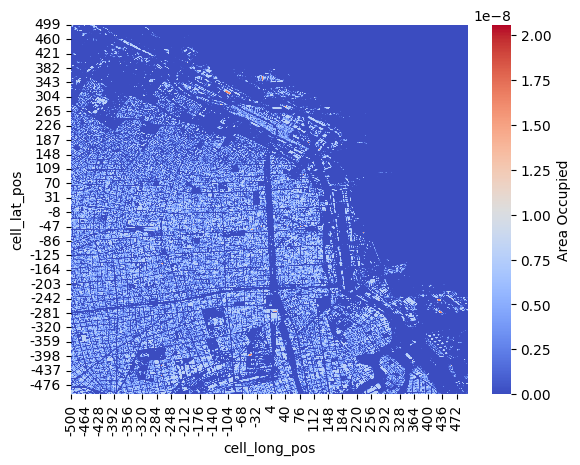

In [29]:
tools.plot_occupied_area_heatmap(intersections)